# Init

In [2]:
import pandas as pd
from bert_score import BERTScorer
import csv
import numpy as np
import itertools
import json
import matplotlib.pyplot as plt

import eval_util
from eval_util import get_bertscore

/Users/vincentlin246/git/da-stance-detection/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
scorer = BERTScorer(lang='en', rescale_with_baseline=True)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# SR/EDA

In [30]:
sr_csv = 'augment/data/eda_augmented.csv'
sr_df = pd.read_csv(sr_csv)
print(sr_df.shape)
sr_df.head()

(5868, 3)


,Tweet,Target,Stance
0,he who exalts himself shall be humbled and he ...,Atheism,0
1,humble he who exalts himself shall be humbled ...,Atheism,0
2,he who exalts himself shall be humbled and he ...,Atheism,0
3,rt prayerbullets i remove nehushtan moves of g...,Atheism,0
4,rt prayerbullets i remove nehushtan previous m...,Atheism,0


In [31]:
# detecting errors in sr csv

i = 0

while i < sr_df.shape[0]:
    score = eval_util.get_bertscore(scorer,
                                    sr_df.iloc[i]['Tweet'],
                                    [sr_df.iloc[i+1]['Tweet'],
                                     sr_df.iloc[i+2]['Tweet']])
    if score[0] < 0.2 or score[1] < 0.2:
        print(i)
        print(sr_df.iloc[i]['Tweet'])
        print(sr_df.iloc[i+1]['Tweet'])
        print(sr_df.iloc[i+2]['Tweet'])
        print(f'{score=}')
        break
    if i % 30 == 0:
        print(f'{i=}')
    i += 3

i=0
i=30
i=60
i=90
i=120
i=150
i=180
i=210
i=240
i=270
i=300


KeyboardInterrupt: 

In [34]:
# calculate bertscores for sr csv. each tweet has 2 sr augmentations, so
# tweets are grouped into 3s. scores generated by pairs, so scores in written
# file are grouped into 2s
# score for first 1000 original tweets

sr_scores = []

for i in range(0, 300, 3):
    score = eval_util.get_bertscore(scorer,
                                    sr_df.iloc[i]['Tweet'],
                                    [sr_df.iloc[i+1]['Tweet'],
                                     sr_df.iloc[i+2]['Tweet']])
    sr_scores.append(score[0].item())
    sr_scores.append(score[1].item())
    if i % 30 == 0:
        print(f'{i=}')

print(sr_scores)
print(sum(sr_scores) / len(sr_scores))

i=0
i=30
i=60
i=90
i=120
i=150
i=180
i=210
i=240
i=270
[0.9194066524505615, 1.0, 0.7903552651405334, 0.9144214391708374, 0.6767346262931824, 0.8002625703811646, 0.8622763752937317, 1.0, 0.5533828735351562, 0.7159475684165955, 0.6224112510681152, 0.872754693031311, 0.791226863861084, 0.9488388299942017, 0.8631373643875122, 0.9319820404052734, 0.7543779611587524, 0.7543779611587524, 0.6906721591949463, 0.9229633808135986, 0.7298611402511597, 0.91314297914505, 0.5845992565155029, 0.937804639339447, 0.6916052103042603, 0.7732353806495667, 0.6616213917732239, 1.0000007152557373, 0.7297664880752563, 0.880256175994873, 0.7949947714805603, 0.8029112815856934, 0.8533286452293396, 0.8882390856742859, 0.6788867712020874, 0.7691115140914917, 0.6013405323028564, 0.6566813588142395, 0.93427973985672, 1.0000007152557373, 0.6184293627738953, 0.8037917017936707, 0.9214563965797424, 0.9778719544410706, 0.6340242624282837, 0.6930768489837646, 0.8338553309440613, 0.9226289391517639, 0.7666005492210388, 0.

In [35]:
with open('augment/data/scores/eda_scores.txt', 'w') as f:
    for s in sr_scores:
        f.write(f'{s}\n')

# CMLM

In [223]:
cmlm_csv = 'augment/data/cmlm/climate_cmlm.csv'
cmlm_df = pd.read_csv(cmlm_csv)

cmlm_df.head()

,Tweet,Target,Stance
0,What is the #energiewende agenda? Why are they...,Climate Change is a Real Concern,1
1,@climasphere Stocker: Fish catch potential cou...,Climate Change is a Real Concern,1
2,"...a longer memory, and a sterner sense of jus...",Climate Change is a Real Concern,2
3,"Boni ""Future Sea level rise will not be unifor...",Climate Change is a Real Concern,1
4,@climasphere Bony: Extreme weather events (hea...,Climate Change is a Real Concern,1


In [54]:
cmlm_df.iloc[279]['Tweet']

'Today Europe is breaking heat records, while Asia is breaking the lowest temperature records?! Should we not be concerned?! #SemST'

In [51]:
# detecting errors in cmlm csv

i = 0

while i < cmlm_df.shape[0]:
    assert cmlm_df.shape[0] % 3 == 0
    size = cmlm_df.shape[0] // 3

    score = eval_util.get_bertscore(scorer,
                                    cmlm_df.iloc[i]['Tweet'],
                                    [cmlm_df.iloc[size + i*2]['Tweet'],
                                     cmlm_df.iloc[size + i*2 + 1]['Tweet']])
    if score[0] < 0.2 or score[1] < 0.2:
        print(i)
        print(cmlm_df.iloc[i]['Tweet'])
        print(cmlm_df.iloc[size + i*2]['Tweet'])
        print(cmlm_df.iloc[size + i*2 + 1]['Tweet'])
        print(f'{score=}')
        break
    if i % 30 == 0:
        print(f'{i=}')
    i += 3

KeyboardInterrupt: 

In [225]:
cmlm_scores = []

assert cmlm_df.shape[0] % 3 == 0
size = cmlm_df.shape[0] // 3

for i in range(0, 100, 3):
    score = eval_util.get_bertscore(scorer,
                                    cmlm_df.iloc[i]['Tweet'],
                                    [cmlm_df.iloc[size + i*2]['Tweet'],
                                     cmlm_df.iloc[size + i*2 + 1]['Tweet']])
    cmlm_scores.append(score[0].item())
    cmlm_scores.append(score[1].item())
    if i % 30 == 0:
        print(f'{i=}')

print(cmlm_scores)
print(sum(cmlm_scores) / len(cmlm_scores))

i=0
i=30
i=60
i=90
[0.7537956237792969, 0.8123339414596558, 0.8005093932151794, 0.8941054344177246, 0.9544548392295837, 1.0, 0.8777342438697815, 0.8085028529167175, 0.7443559169769287, 0.8894429802894592, 0.9354847073554993, 0.7197843194007874, 0.9606764912605286, 0.8387289643287659, 0.8198121786117554, 0.7700933218002319, 0.8285289406776428, 0.8063139915466309, 0.9640417695045471, 0.767421305179596, 0.890238344669342, 0.8296233415603638, 0.8335596919059753, 0.8447245955467224, 0.8082115054130554, 0.7551962733268738, 0.7812454700469971, 0.9228560328483582, 0.8754584789276123, 0.8714808225631714, 0.8180770874023438, 0.8483625054359436, 0.8168714046478271, 0.7571121454238892, 0.7947274446487427, 0.8322378396987915, 0.8377976417541504, 0.8546894192695618, 0.9508518576622009, 0.9080546498298645, 0.5848775506019592, 0.809323251247406, 1.0, 1.0, 0.8840883374214172, 1.0, 0.7914504408836365, 0.6658787727355957, 0.7162534594535828, 0.8484394550323486, 0.8583559393882751, 0.8917696475982666, 0.8

In [228]:
with open('augment/data/scores/climate_cmlm_scores.txt', 'w') as f:
    for s in cmlm_scores:
        f.write(f'{s}\n')

# LLAMA

In [133]:
t1 = "Hillary Clinton's latest actions have shown a blatant disregard for the truth and a deliberate attempt to cover up her own wrongdoings. #Benghazi #HillaryClinton #Lies"
t2 = "It's unacceptable that Hillary Clinton would wipe clean her server and delete 30,000 emails, all while claiming innocence. #DerelictionOfDuty #HillaryClinton #CoverUp"
t3 = "Hillary Clinton's dereliction of duty and lies about #Benghazi have caused immense harm to the families of the victims and to the American people as a whole. #Justice #HillaryClinton #Accountability"

l1 = [t1, t2, t3]
l2 = [t2, t1, t3]
l3 = [t3, t2, t1]

for l in [l1, l2, l3]:
    print(get_bertscore(scorer, l[0], [l[1], l[2]]))

tensor([0.3003, 0.4280])
tensor([0.3003, 0.2743])
tensor([0.2743, 0.4280])


In [76]:
llama_df = pd.read_csv('augment/data/new_llama_augmented.csv')
llama_df.head()

,Original,Tweet,Target,Stance
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Ted Cruz's actions demonstrate a clear derelic...,Hillary Clinton,0
1,"@tedcruz And, #HandOverTheServer she wiped cle...","The revelation of 30,000 deleted emails and mi...",Hillary Clinton,0
2,"@tedcruz And, #HandOverTheServer she wiped cle...",Ted Cruz's refusal to hand over the server and...,Hillary Clinton,0
3,"@tedcruz And, #HandOverTheServer she wiped cle...","The deletion of 30,000 emails and the spreadin...",Hillary Clinton,0
4,"@tedcruz And, #HandOverTheServer she wiped cle...",Ted Cruz's actions and statements on Benghazi ...,Hillary Clinton,0


In [66]:
print(llama_df.iloc[0]['Original'])
for i in range(4):
    print(llama_df.iloc[i]['Tweet'])

@tedcruz And, #HandOverTheServer she wiped clean + 30k deleted emails, explains dereliction of duty/lies re #Benghazi,etc #tcot
Ted Cruz's actions demonstrate a clear dereliction of duty and a lack of transparency, as evidenced by the 30,000 deleted emails and misleading statements about Benghazi. #HandOverTheServer #tcot
The revelation of 30,000 deleted emails and misleading statements about Benghazi raises serious questions about Ted Cruz's ability to lead and his commitment to transparency. #HandOverTheServer #tcot
Ted Cruz's refusal to hand over the server and his history of misleading statements about Benghazi demonstrate a pattern of untrustworthiness and a lack of accountability. #HandOverTheServer #tcot
The deletion of 30,000 emails and the spreading of false information about Benghazi highlight the urgent need for Ted Cruz to be held accountable for his actions. #HandOverTheServer #tcot


In [67]:
get_bertscore(scorer,
            #   llama_df.iloc[0]['original'],
            llama_df.iloc[0]['Tweet'],
              [llama_df.iloc[i]['Tweet'] for i in range(1,4)])

tensor([0.6249, 0.5625, 0.5665])

In [102]:
count = 0
original = ''
augs = []
llama_scores = []
i = 0
while count < 80:
    row = llama_df.iloc[i]
    if row['Original'] != original:
        # print(f'{original=}')
        # print(f'{augs=}')

        if len(augs) > 0:
            scores = get_bertscore(scorer, original, augs)
            # print(f'{scores.item()=}')
            for s in scores:
                llama_scores.append(s)

            augs = []

        original = row['Original']
        count += 1

    augs.append(row['Tweet'])
    if count % 20 == 0:
        print(f'{count=}')
    i += 1


count=20
count=20
count=20
count=20
count=20
count=20
count=40
count=40
count=40
count=40
count=40
count=60
count=60
count=60
count=60
count=60
count=60
count=60
count=60
count=80


In [103]:
print(f'{len(llama_scores)=}')
print(sum(llama_scores) / len(llama_scores))

len(llama_scores)=464
tensor(0.2459)


In [104]:
with open('augment/data/scores/scores.txt', 'w') as f:
    for s in llama_scores:
        f.write(f'{s}\n')

# Graphs

<Axes: title={'center': 'F1 scores of Data Augmentation Methods'}, xlabel='Augmentation Method'>

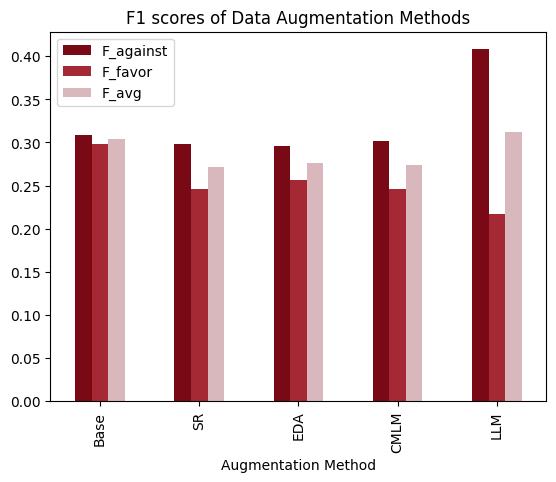

In [12]:
# f_avg values copied from logs folder,
# each set of values come from corresponding model csv

df = pd.DataFrame([
    ['Base', 0.3091, 0.2983, 0.3037],
    ['SR', 0.2977, 0.2455, 0.2716],
    ['EDA', 0.2963, 0.2562, 0.2762],
    ['CMLM', 0.3012, 0.2466, 0.2739],
    ['LLM', 0.4081, 0.2173, 0.3127],
], columns=['Augmentation Method', 'F_against', 'F_favor', 'F_avg'])

colors = ['#d8b8bc', '#a52835', '#780915'][::-1]

df.plot(
    x='Augmentation Method',
    kind='bar',
    stacked=False,
    title='F1 scores of Data Augmentation Methods',
    color=colors
)

In [7]:
model_names = ['base', 'sr', 'eda', 'cmlm', 'llm']

losses = {k: [] for k in model_names}
val_losses = {k: [] for k in model_names}

for model in model_names:
    log_df = pd.read_csv(f'logs/{model}_logs.csv')

    for i in range(20):
        row = log_df.iloc[i]
        if i % 2 == 0:
            losses[model].append(row['loss'])
        else:
            val_losses[model].append(row['eval_loss'])

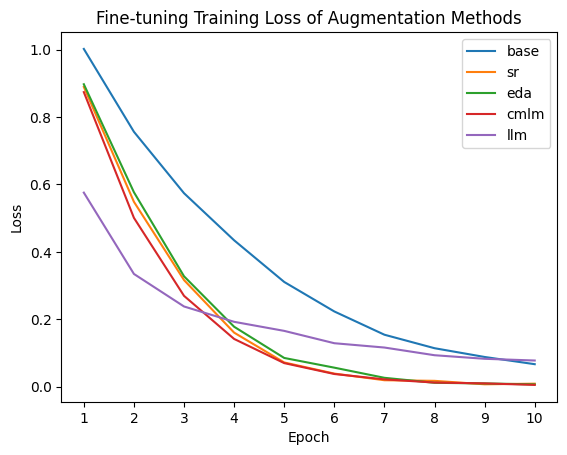

In [9]:
for model in model_names:
    plt.plot(range(1, 11), losses[model], label=model)

plt.title('Fine-tuning Training Loss of Augmentation Methods')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1,11))
plt.legend()
plt.show()

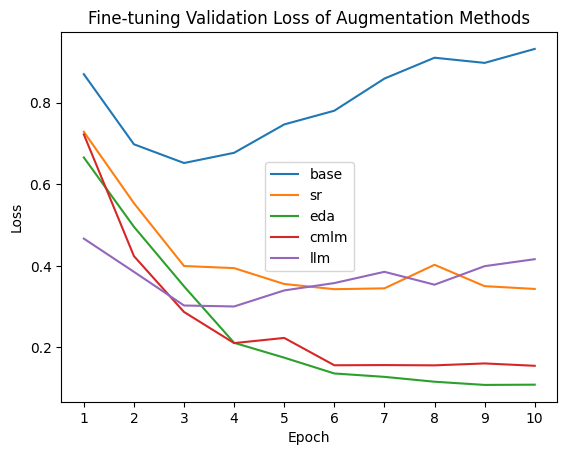

In [11]:
for model in model_names:
    plt.plot(range(1, 11), val_losses[model], label=model)

plt.title('Fine-tuning Validation Loss of Augmentation Methods')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1,11))
plt.legend()
plt.show()

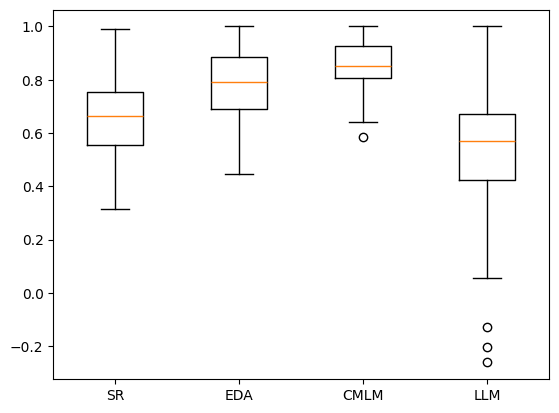

In [7]:
score_fp = 'augment/data/scores/'

with open(score_fp + 'sr_scores.txt') as f:
    sr_data = [float(line) for line in f.readlines()]

with open(score_fp + 'eda_scores.txt') as f:
    eda_data = [float(line) for line in f.readlines()]

with open(score_fp + 'cmlm_scores.txt') as f:
    cmlm_data = [float(line) for line in f.readlines()]

with open(score_fp + 'llama_scores.txt') as f:
    llama_data = [float(line) for line in f.readlines()]

fig, ax = plt.subplots()
ax.boxplot([sr_data, eda_data, cmlm_data, llama_data],
           labels=['SR', 'EDA', 'CMLM', 'LLM'])

plt.show()

